Author: Daniel Abadjiev  
&nbsp;&nbsp;&nbsp; with lots of help from Eliza  
Date: June 3, 2025  
Description: a notebook to test some stuff with smartpixels data and get a handle on the data format/machine learning general things.   

Will partially follow Eliza's github, will also follow this tutorial https://www.tensorflow.org/tutorials/keras/classification

In [1]:
from OptimizedDataGenerator4 import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2025-06-06 14:53:12.796912: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-06 14:53:12.797437: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-06 14:53:12.800350: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-06 14:53:12.809074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749239592.825324 2870393 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749239592.82

In [ ]:
data_dir = "../smartpixML/MuonColliderSim/Simulation_Output/";
tf_dir = "./tfRecDirDaniel"
labels_dir = "./labelsDirDaniel" #leftover 
dataFormatter = OptimizedDataGenerator(
    tf_records_dir=tf_dir,
    # data_directory_path=data_dir,
    # file_type="parquet",
    load_records=True,
    muon_collider=True,
    x_feature_description=['cluster','x_profile','x_size'],
    batch_size=3000,
    filteringBIB=True
    )
dataFormatter.tfrecord_filenames.size

365

In [4]:
print(dataFormatter)
# print(dataFormatter.x_features)
print(dataFormatter.x_feature_description)
# dataFormatter.x_features['x_profile']
print(dataFormatter.x_features['x_size'])
print(np.shape(dataFormatter.x_features['x_size']))
print(dataFormatter.labels)
# plt.plot(dataFormatter.labels)
model.fit(x=dataFormatter.x_features['x_size'],y=dataFormatter.labels)

['cluster', 'x_profile', 'x_size']


AttributeError: 'OptimizedDataGenerator' object has no attribute 'x_features'

In [2]:
validation_dir = "./tf_records1000Daniel/tfrecords_validation/"
train_dir = "./tf_records1000Daniel/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description)
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description)
# trainODG._parse_tfrecord_fn()

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None,1), name="z_global"),
    # tf.keras.layers.Input(shape=(13,), name="y_profile"),
    # tf.keras.layers.Dense(128,activation='relu'),
    # tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks=[]
learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
callbacks=[]
history = model.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=10)



Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - binary_accuracy: 0.4751 - loss: 0.7000 - val_binary_accuracy: 0.6424 - val_loss: 0.6740
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - binary_accuracy: 0.6218 - loss: 0.6680 - val_binary_accuracy: 0.6202 - val_loss: 0.6602
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - binary_accuracy: 0.6133 - loss: 0.6635 - val_binary_accuracy: 0.6241 - val_loss: 0.6587
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - binary_accuracy: 0.6172 - loss: 0.6610 - val_binary_accuracy: 0.6335 - val_loss: 0.6513
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - binary_accuracy: 0.6162 - loss: 0.6549 - val_binary_accuracy: 0.6418 - val_loss: 0.6482
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - binary_accuracy: 0.5618 - loss: 0.6896 - val_binary_accuracy: 0.6474 - val_loss: 0.6408
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - binary_accuracy: 0.6200 - loss: 0.6587 - val_binary_accuracy: 0.6492 - val_loss: 0.6377
Epoch 8/10
60

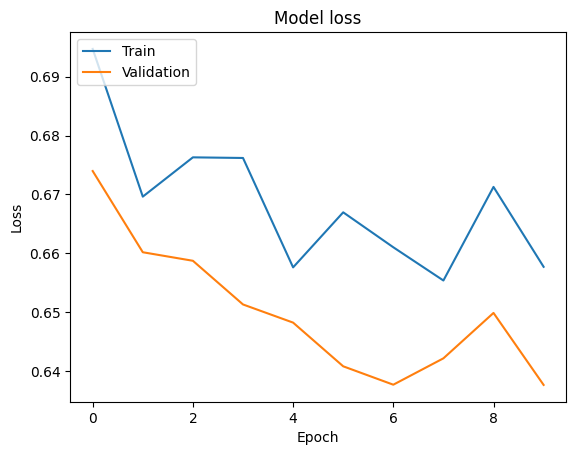

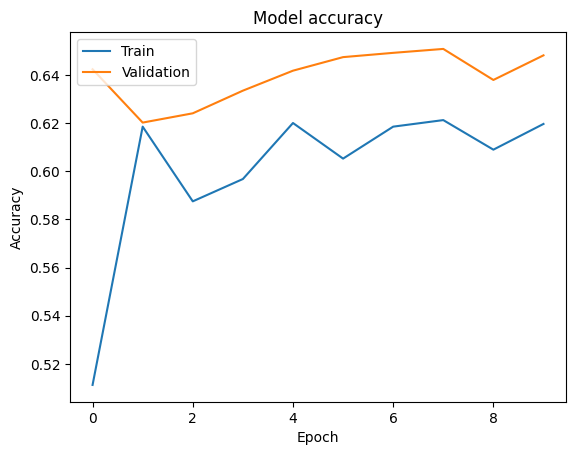

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, None, 10)       │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, None, 10)       │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, None, 1)        │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,725 (14.55 KB)

 Trainable params: 1,241 (4.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,484 (9.71 KB)

In [7]:
#// plotting code from google ai https://www.google.com/search?client=firefox-b-1-d&q=plot+tensorflow+model+history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model.summary()

In [6]:
test_loss, test_acc = model.evaluate(validationODG)
print("test accuracy: "+str(test_acc))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - binary_accuracy: 0.6085 - loss: 0.6660
test accuracy: 0.6481879353523254
